In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.metrics import BinaryAccuracy
from densenetmodel import create_model
import os
import cv2

In [3]:
x_train_paths=np.load('Dataset/X_train.npy',allow_pickle=True)
y_train=np.load('Dataset/y_train.npy',allow_pickle=True)
x_test_paths=np.load('Dataset/X_test.npy',allow_pickle=True)
y_test=np.load('Dataset/y_test.npy',allow_pickle=True)

In [6]:
def load_images(image_paths, image_size=(280, 280)):
    """
    This function loads grayscale images from disk based on their file paths and resizes them to a consistent size.
    """
    images = []

    for img_file in image_paths:
        # create the full input path and read the file
        image_path = os.path.join('Dataset\PCOSGen-train\PCOSGen-train\images', img_file)
        
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, image_size)
        # duplicate the grayscale image across three channels
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

        images.append(image)

    return np.array(images)

In [7]:
x_train, y_train = load_images(x_train_paths), y_train
x_test, y_test = load_images(x_test_paths), y_test

In [27]:

def test_model(x_train, y_train, x_test, y_test):
    # dimensions of our images.
    img_width, img_height = 280, 280

    # specify the number of classes
    num_classes = 2

    # create the base pre-trained model
    # create the base pre-trained model
    model = create_model((img_width, img_height, 3), num_classes)


    # define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

    # fit the model
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32, callbacks=[early_stopping, learning_rate_reduction])

    # save weights to file
    model.save_weights('model_weights.h5')

    # predict the output 
    predictions = model.predict(x_test)

    # get the class with highest probability for each sample
    y_pred = np.argmax(predictions, axis=1)

    return y_pred,model


In [28]:
import os
os.environ['CUDA_VISIBLE_DEVICES']="0"
y_pred,model = test_model(x_train, y_train, x_test, y_test)

The `lr` argument is deprecated, use `learning_rate` instead.


Epoch 1/5
80/80 [==============================] - 51s 557ms/step - loss: 0.5035 - accuracy: 0.7359 - val_loss: 0.4506 - val_accuracy: 0.7578 - lr: 1.0000e-04
Epoch 2/5
80/80 [==============================] - 44s 548ms/step - loss: 0.4234 - accuracy: 0.7785 - val_loss: 0.4333 - val_accuracy: 0.7844 - lr: 1.0000e-04
Epoch 3/5
80/80 [==============================] - 44s 548ms/step - loss: 0.4052 - accuracy: 0.7926 - val_loss: 0.4319 - val_accuracy: 0.7891 - lr: 1.0000e-04
Epoch 4/5
80/80 [==============================] - 44s 547ms/step - loss: 0.3616 - accuracy: 0.8191 - val_loss: 0.4773 - val_accuracy: 0.7625 - lr: 1.0000e-04
Epoch 5/5
80/80 [==============================] - ETA: 0s - loss: 0.3541 - accuracy: 0.8207
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
20/20 [==============================] - 4s 142ms/step


c:\Users\project\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


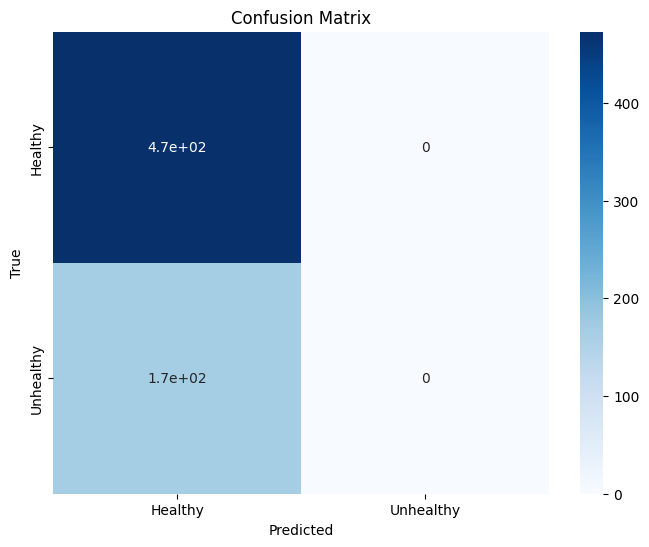

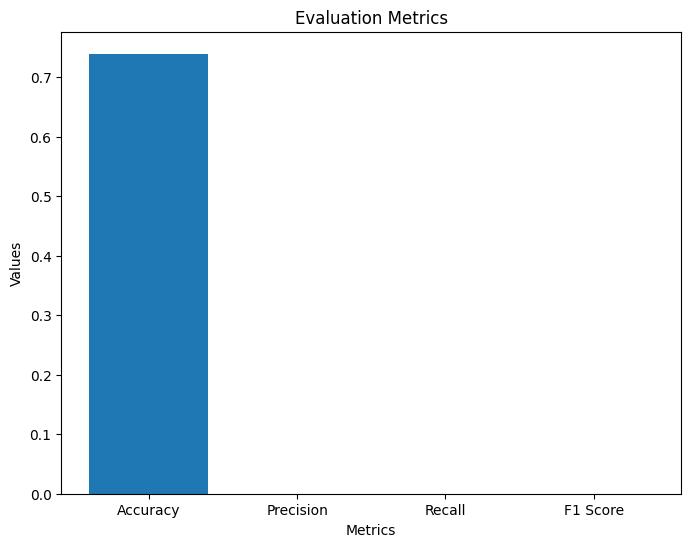

In [20]:
from matplotlib import pyplot as plt
!pip install seaborn
import seaborn as sns
from sklearn.metrics import *
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Healthy', 'Unhealthy']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.show()

In [22]:
import matplotlib.pyplot as plt
!pip install shap
import shap

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/450.3 kB ? eta -:--:--
   --------------------------------------- 450.3/450.3 kB 13.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------- -------------- 1.7/2.6 MB 52.5 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 41.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   -- ------------------------------------- 1.7/28.1 MB 53.5 MB/s eta 0:00:01
   ---- ----------------------------------- 3.3/28.1 MB 41.7 MB/s eta 0:00:01
   ------- -------------------------------- 5.3/28.1 MB 48.9 MB/s eta 0:00:01
   --------- ----------------

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


ValueError: masker cannot be None.

In [31]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(x_test, nsamples=100)

ValueError: masker cannot be None.

In [46]:
x_test = load_images(x_test_paths)
def dummy_model_predict(input_data):
    # Replace this with your own logic to simulate the model's output
    return np.random.rand(len(input_data), 2)  # Replace num_classes with the number of classes in your model

# Create a SHAP masker using the background data
masker = shap.maskers.Image(x_test[:5])

# Create a SHAP explainer using the dummy function and the masker
explainer = shap.Explainer(dummy_model_predict, masker)

# Choose a subset of your data
subset_indices = np.random.choice(len(x_test), 7, replace=True)  # Adjust the number based on your time constraints
x_test_subset = x_test[subset_indices]

# Create a SHAP masker using the subset data
masker = shap.maskers.Image(x_test_subset)

# Create a SHAP explainer using the dummy function and the masker
explainer = shap.Explainer(dummy_model_predict, masker)

# Create interpretability plots for the chosen images
for idx in range(len(x_test_subset)):
    shap_values = explainer(x_test_subset[idx:idx+1])
    shap.image_plot(shap_values, x_test_subset[idx])